In [3]:
# !pip install sentence-transformers
# !pip install wordcloud
# !pip install stop_words
# !pip install spacy
# !python3 -m spacy download en_core_web_sm

In [4]:
# General
import pandas as pd 
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

# NLP
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import spacy

####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [25]:
# data/TABSA_dataset/all-data.csv
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [18]:
# data/TABSA_dataset/all-data.csv

data_df = pd.read_csv("data/all-data.csv", header = None, encoding='latin-1')
data_df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [19]:
data_df.columns = ['Senti', 'Texts']

with pd.option_context('display.max_colwidth', -1):     
    display(data_df[0:10])


,Senti,Texts
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
6,positive,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
7,positive,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn ."
8,positive,Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .
9,positive,"Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales ."


### Find out the top 100 words which are getting used in the text of the data

In [20]:
top_N = 100 #top 100 words

#convert list of list into text
a = data_df['Texts'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [26]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [27]:
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [28]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

### Lemmatization
I am using Wordnet Lemmatizer with appropriate POS tag.
Function to map word with its POS tag

In [29]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]


### Frequency distribution 

In [31]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

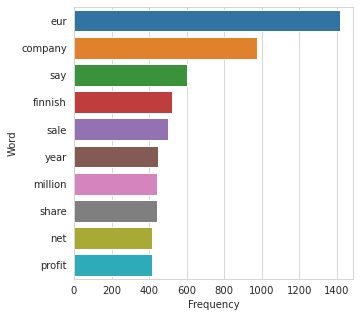

In [32]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

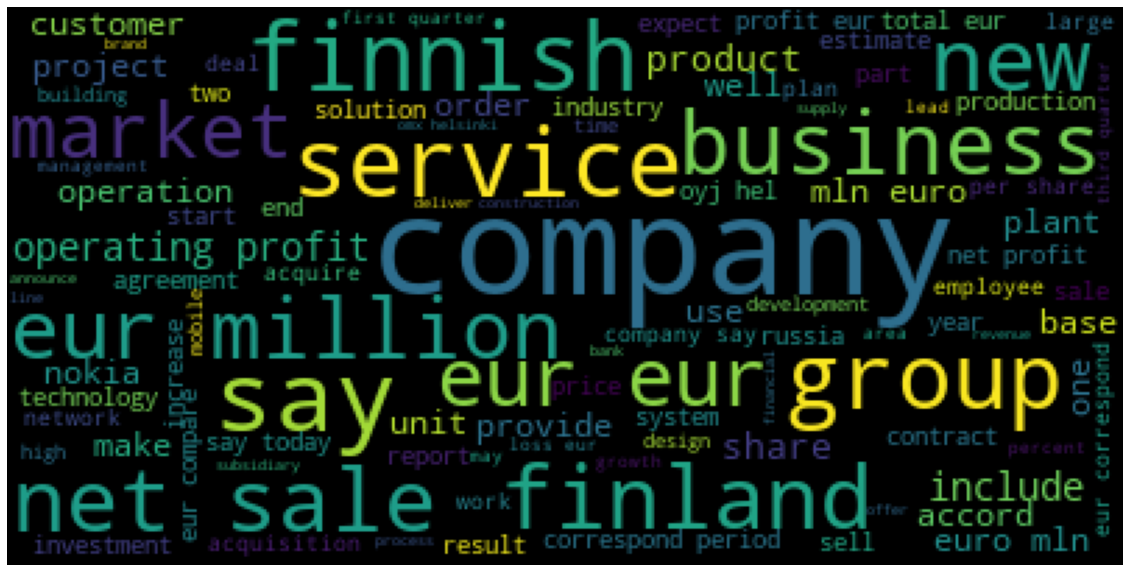

In [33]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (20,20))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

wc(lemmatized_output,'black','Common Words' )